# What to do
chapter 4 of the fish book

# Loss functions

## Mean squared error

In [1]:
import numpy as np

In [2]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [4]:
y1 = [0.1, 0.05, 0.6, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0]

In [5]:
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [6]:
mean_squared_error(np.array(y1), np.array(t))

0.09625000000000003

In [7]:
mean_squared_error(np.array(y2), np.array(t))

0.59750000000000003

### Cross Entropy Error

In [8]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y + delta))

In [9]:
cross_entropy_error(np.array(y1), np.array(t))

0.51082545709933802

In [10]:
cross_entropy_error(np.array(y2), np.array(t))

2.3025840929945458

### Mini batch

In [11]:
%run mnist.py

ERROR:root:File `'mnist.py'` not found.


In [12]:
(x_train, t_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

NameError: name 'load_mnist' is not defined

In [ ]:
x_train.shape

In [ ]:
t_train.shape

In [ ]:
train_size = x_train.shape[0]

In [ ]:
batch_size = 10

In [ ]:
batch_mask = np.random.choice(train_size, batch_size)

In [ ]:
x_batch = x_train[batch_mask]

In [ ]:
t_batch = t_train[batch_mask]

In [ ]:
np.random.choice(60000, 10)

### Mini batch cross entropy

- one hot

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
       
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

- in the case of labels

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
       
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7))/batch_size

# Numerical Differentiation

In [ ]:
# Bad one 
def numerical_diff(f, x):
    h = 10e-50 # too small
    return(f(x+h)-f(x))/h #one sided

In [ ]:
def x_3(x):
    return x**3

In [ ]:
numerical_diff(x_3, 1)

In [ ]:
# Better
def numerical_diff(f, x):
    h = 1e-4 #0.0001
    return (f(x+h)-f(x-h))/(2*h)

In [ ]:
numerical_diff(x_3, 1)

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.plot(x,y)

In [ ]:
numerical_diff(function_1, 5)

In [ ]:
numerical_diff(function_1, 10)

In [ ]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

In [ ]:
tf = tangent_line(function_1, 5)
y2 = tf(x)

In [ ]:
plt.plot(x,y)
plt.plot(x, y2)

## Partial Differntial

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [ ]:
fig = plt.figure()

In [ ]:
ax = fig.gca(projection = '3d')

In [ ]:
x0 = np.arange(-3,3,0.1)

In [ ]:
X, Y = np.meshgrid(x0, x0)

In [ ]:
surf = ax.plot_surface(X, Y, function_2([X,Y]), linewidth = 0, cmap = 'bwr')

In [ ]:
fig.colorbar(surf)

In [ ]:
fig

In [ ]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [ ]:
numerical_diff(function_tmp1, 3.0)

In [ ]:
def function_tmp2(x1):
    return x1*x1 + 3.0**2.0

In [ ]:
numerical_diff(function_tmp2, 4.0)

## gradients

In [50]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val
       
    return grad

In [51]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [52]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [53]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

In [54]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad

In [55]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [56]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [57]:
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

C:\Users\shota.shimizu\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


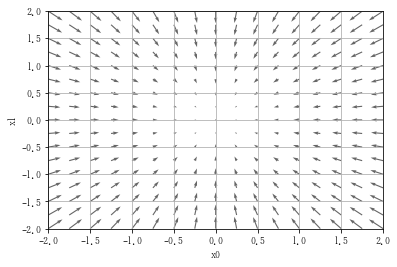

In [58]:

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()

## Gradient descent

In [59]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr *grad
    
    return x

In [60]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([ -6.11110793e-10,   8.14814391e-10])

In [61]:

gradient_descent(function_2, init_x = init_x, lr = 10, step_num = 100)

array([  2.34235971e+12,  -3.96091057e+12])

In [62]:
gradient_descent(function_2, init_x = init_x, lr = 1e-8, step_num = 100)

array([  2.34235971e+12,  -3.96091057e+12])

## Gradients in neural networks

### Simple nets

In [63]:
%run functions.py
%run gradient.py

In [64]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [65]:
net = simpleNet()

In [66]:
net.W

array([[-1.36810383, -0.45929801,  0.29511389],
       [ 0.08946822,  1.04731395, -0.03694915]])

In [67]:
x = np.array([0.6, 0.9])

In [68]:
p = net.predict(x)

In [69]:
p

array([-0.7403409 ,  0.66700375,  0.1438141 ])

In [70]:
np.argmax(p)

1

In [71]:
t = np.array([0, 0, 1])

In [72]:
net.loss(x, t)

1.1315515846972293

### gradients

In [73]:
def f(W):
    return net.loss(x, t)

In [74]:
dW = numerical_gradient(f, net.W)

In [75]:
dW

array([[ 0.07993569,  0.32654478, -0.40648047],
       [ 0.11990354,  0.48981718, -0.60972071]])

## Learning Algorithms

### stochastic gradient descent

In [109]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # initialize weights
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t)/float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y-t)/batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis = 0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1)*da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis = 0)
        
        return grads

In [110]:
net = TwoLayerNet(input_size = 784, hidden_size=100, output_size=10)


In [112]:
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [79]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [80]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)


In [81]:
grads = net.numerical_gradient(x, t)

In [83]:
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [1]:
1


1

### Mini batch (SGD)

In [114]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [121]:
train_loss_list = []


iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100

learning_rate = 0.1
network = TwoLayerNet(input_size = 784, hidden_size=50, output_size=10)


In [118]:
import time

In [122]:
for i in range(iters_num):
    # time test
    if i == 0:
        ts = time.time()
    if i == 1:
        secs = time.time() - ts
        print("One run took " + str(secs) + " seconds, " + str(iters_num) + " runs will take an estimated " + str(secs*iters_num) + " seconds.")
        
    # mini batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # Gradient
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # faster
    
    # Update parameters
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate *grad[key]
        
    # Learning process
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
        
secs = time.time() - ts
print("Took " +str(secs) + " in total.")

One run took 0.009024858474731445 seconds, 10000 runs will take an estimated 90.24858474731445 seconds.
Took 14.793323516845703 in total.


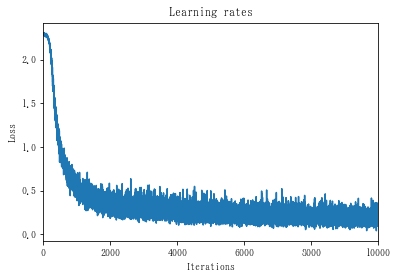

In [126]:
fig = plt.figure()
plt.plot(range(0, iters_num),train_loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.xlim(0, 10000)
plt.title("Learning rates")

In [127]:
np.exp(-0.5)

0.60653065971263342

### Check on test data

In [128]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size/batch_size, 1)

In [130]:
iters_num = 10000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size = 784, hidden_size=50, output_size=10)

In [132]:
for i in range(iters_num):
    # mini batch 
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # Gradient
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # Parameters
    for key in ('W1', "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc| " + str(train_acc) + ", " + str(test_acc))
        
        
        
        

train acc, test acc| 0.0972166666667, 0.098
train acc, test acc| 0.775233333333, 0.7788
train acc, test acc| 0.8772, 0.882
train acc, test acc| 0.897916666667, 0.9004
train acc, test acc| 0.908733333333, 0.911
train acc, test acc| 0.915033333333, 0.9163
train acc, test acc| 0.918666666667, 0.9199
train acc, test acc| 0.922433333333, 0.9241
train acc, test acc| 0.92665, 0.9269
train acc, test acc| 0.93045, 0.9311
train acc, test acc| 0.932716666667, 0.9324
train acc, test acc| 0.935666666667, 0.9362
train acc, test acc| 0.9381, 0.9381
train acc, test acc| 0.93965, 0.9395
train acc, test acc| 0.942333333333, 0.9427
train acc, test acc| 0.943566666667, 0.9429
train acc, test acc| 0.946116666667, 0.9442


In [136]:
len(train_acc_list)

17

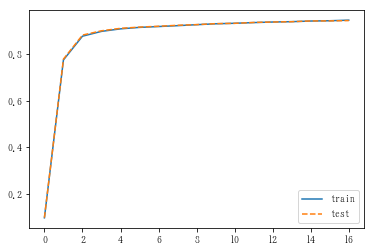

In [142]:
fig = plt.figure()
plt.plot(range(len(train_acc_list)), train_acc_list, label = "train")
plt.plot(range(len(train_acc_list)), test_acc_list, linestyle = "--", label = "test")
plt.legend()